<a href="https://colab.research.google.com/github/diegulio/Breed_Recognition-to-Buscomiperro/blob/main/AnalisisExploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


## DataFrames

In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/Colab Data/Proyecto buscomiperro/labels.csv')
cat = pd.read_csv('/content/drive/MyDrive/Colab Data/Proyecto buscomiperro/cat_labels.csv') 
cat = cat.iloc[:100,:]
dog = pd.read_csv('/content/drive/MyDrive/Colab Data/Proyecto buscomiperro/dog_labels.csv') 
nd = pd.read_csv('/content/drive/MyDrive/Colab Data/Proyecto buscomiperro/NoDetected_labels.csv')
path = '/content/drive/MyDrive/Colab Data/Proyecto buscomiperro' #Dirección de carpeta donde se encuentran los archivos

## Visualización de Imágenes

Visualizamos las distintas imágenes que podemos encontrar

(178, 250, 3)


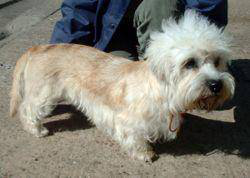

In [ ]:
i = random.randint(0,len(labels))
img_id = labels.iloc[i,0] # id de la imagen aleatoria
img = load_img(path + '/features/'+img_id + '.jpg')
array = img_to_array(img)
print(array.shape)
img

Podemos ver que las imagenes presentan distintas dimensiones, por lo que se debemos hacer que sean igualas para tener vectores de las mismas dimensiones, para eso usare el tamaño que mas se repita

## Redimension Imagenes

In [ ]:
def get_dim(row):
  id = row.id
  img = load_img(path + '/features/'+ id + '.jpg')
  arr = img_to_array(img)
  return (arr.shape[0],arr.shape[1])

Agregamos la dimension de la imagen como columna del DataFrame 'labels'

In [ ]:
labels['Img_Dim'] = labels.apply(get_dim, axis = 1)

In [ ]:
labels

,id,breed,Img_Dim
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,"(375, 500)"
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,"(375, 500)"
2,001cdf01b096e06d78e9e5112d419397,pekinese,"(375, 500)"
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,"(344, 400)"
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,"(500, 500)"
...,...,...,...
10412,o6,No detectado,"(168, 300)"
10413,o7,No detectado,"(752, 1338)"
10414,o8,No detectado,"(218, 231)"
10415,o9,No detectado,"(145, 347)"


In [ ]:
# Guardamos el csv para no volver a correr esto
labels.to_csv('labels_dim.csv', index = False)

Ahora quiero saber que dimension es aquella que más se repite para adaptar todas las imagenes a esta dimension y as desfigurar la menor cantidad de imagenes posible

In [ ]:
labels['Img_Dim'].value_counts()

(375, 500)    2647
(333, 500)    1033
(500, 375)     616
(500, 333)     363
(334, 500)     172
              ... 
(450, 676)       1
(231, 200)       1
(201, 210)       1
(200, 220)       1
(185, 266)       1
Name: Img_Dim, Length: 2791, dtype: int64

Podemos observar que la dimensión (375, 500) es aquella que más se repite.

In [ ]:
dim = (375,500) # Constante Dimension

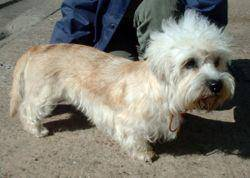

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Cargamos imagen original
img = cv2.imread(path + '/features/'+img_id + '.jpg')
cv2_imshow(img)


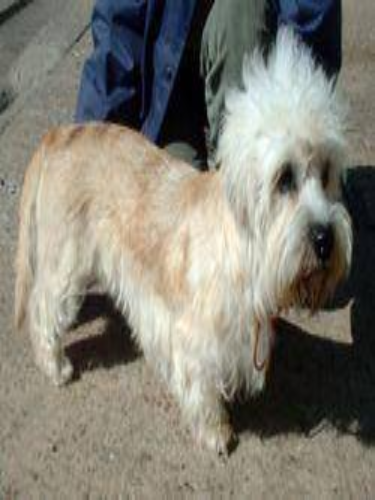

In [ ]:
# Redimensionamos imagenes y la mostramos
resize_img = cv2.resize(img, dim)
cv2_imshow(resize_img)

Ahora redimensionaremos cada imagen y lo almacenaremos 

In [ ]:
def save_resized_img(row, dim):

  save_path = '/content/features_resized/' # Carpeta donde se guardará las imagenes redimensionadas
  original_path = '/content/drive/MyDrive/Colab Data/Proyecto buscomiperro/features/'
  img_id = row.id + '.jpg' # Nombre de la imagen extraida de el df labels
  img = cv2.imread(original_path+ img_id) # Leemos la imagen original
  resize_img = cv2.resize(img, dim) # Redimensionamos la imagen
  cv2.imwrite(save_path + img_id, resize_img) # Guardamos la imagen en el save path
  return 'Listo'




Aplicamos finalmente la función a cada imagen

In [ ]:
labels.apply(lambda row: save_resized_img(row,dim), axis = 1)

0        None
1        None
2        None
3        None
4        None
         ... 
10412    None
10413    None
10414    None
10415    None
10416    None
Length: 10417, dtype: object

Todo listo, ahora convierto a zip y descargo (ya que inicialmente está en colab), pude haber puesto el save_path en google drive para hacerlo directo.

In [ ]:
import shutil
shutil.make_archive('features_resized', 'zip', '/content/features_resized')

'/content/features_resized.zip'

### Visualización de Imágenes redimensionadas

(500, 375, 3)


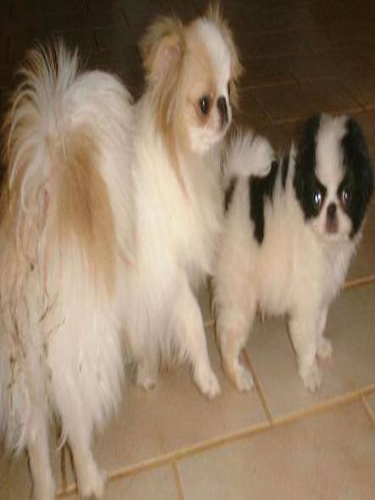

In [ ]:
i = random.randint(0,len(labels))
img_id = labels.iloc[i,0] # id de la imagen aleatoria
img = load_img(path + '/features_resized/'+img_id + '.jpg') # Ahora en resized features
array = img_to_array(img)
print(array.shape)
img

Podemos ver que todas las imagenes tienen la misma dimension (500,375)

## Exploración Labels
Básicamente observaré algunas razas, ver si es necesario alguna traducción o no, de todas formas la traducción puede hacerse alfinal

In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/Colab Data/Proyecto buscomiperro/labels_dim.csv')
labels

,id,breed,Img_Dim
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,"(375, 500)"
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,"(375, 500)"
2,001cdf01b096e06d78e9e5112d419397,pekinese,"(375, 500)"
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,"(344, 400)"
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,"(500, 500)"
...,...,...,...
10412,o6,No detectado,"(168, 300)"
10413,o7,No detectado,"(752, 1338)"
10414,o8,No detectado,"(218, 231)"
10415,o9,No detectado,"(145, 347)"


In [ ]:
print('Se tienen %i imagenes'%len(labels))

Se tienen 10417 imagenes


In [ ]:
labels['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
golden_retriever         67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: breed, Length: 122, dtype: int64

In [ ]:
print('Existen %i categorías'%(len(labels['breed'].value_counts())))

Existen 122 categorías


In [ ]:
labels['breed'].value_counts().index

Index(['scottish_deerhound', 'maltese_dog', 'afghan_hound', 'entlebucher',
       'bernese_mountain_dog', 'shih-tzu', 'great_pyrenees', 'pomeranian',
       'basenji', 'samoyed',
       ...
       'giant_schnauzer', 'german_shepherd', 'walker_hound', 'otterhound',
       'tibetan_mastiff', 'komondor', 'golden_retriever', 'brabancon_griffon',
       'eskimo_dog', 'briard'],
      dtype='object', length=122)

Tomaria mucho trabajo manual el convertir las razas a español, ya que normalmente algunas también se utilizan en inglés, otra punto que se podría dejar para un futuro es el quitarle la palabra "dog" o incluso eliminar algunas razas, como "giant_schnauzer", y dejarla solo como "schnauzer"

## Referencias

COMPUTER-VISION: https://likegeeks.com/es/procesar-de-imagenes-en-python/ 